# Data Science Job Salary Prediction

## 1. Looking at Big Picture

### Problem Statement
The goal for a machine learning perspective would be to perform exploratory data analysis (EDA) on the dataset to identify patterns and relationships that could be valuable for building predictive models. This could involve understanding how different features such as job title, experience level, and company size correlate with salaries. Additionally, preprocessing steps like handling missing data and encoding categorical variables might be necessary. The ultimate objective could be to develop a machine learning model that predicts data science job salaries based on the provided features.

### About Dataset
salaries.csv contains a single table with all salary information structured as follows:

- work_year: The year the salary was paid.

- job_title: The role worked in during the year.

- salary_currency: The currency of the salary paid as an ISO 4217 currency code.

- salary: The total gross salary amount paid.

- salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.

- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

- experience_level: The experience level in the job during the year with the following possible values: EN Entry-level / Junior, MI Mid-level / Intermediate, SE Senior-level / Expert, EX Executive-level / Director

- employment_type: The type of employment for the role:
PT Part-time
FT Full-time
CT Contract
FL Freelance

- remote_ratio: The overall amount of work done remotely, possible values are as follows:
0
No remote work (less than 20%)
50
Partially remote/hybrid
100
Fully remote (more than 80%)

- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.

- company_size: The average number of people that worked for the company during the year:
S
less than 50 employees (small)
M
50 to 250 employees (medium)
L
more than 250 employees (large)
## Big Picture 
It is a supervised learning task, we will train different regression models to find patterns in the given data. We will be using batch learning because our dataset is small and there is no continuous flow of data coming into the system. So we do not need to adjust to changing data rapidly.

## 2. Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly_express as px
import country_converter as coco

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dhruv8315/Salary-Predictor/main/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Data Scientist,198600,USD,198600,US,0,US,M
1,2024,EN,FT,Data Scientist,94300,USD,94300,US,0,US,M
2,2024,SE,FT,Data Science,135800,USD,135800,US,100,US,M
3,2024,SE,FT,Data Science,95100,USD,95100,US,100,US,M
4,2024,EN,FT,Data Science,86900,USD,86900,US,100,US,M


## 3.Explore and visualize the data to gain insights.

### Getting information from the Dataset

In [3]:
df.shape

(16965, 11)

In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16965 entries, 0 to 16964
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16965 non-null  int64 
 1   experience_level    16965 non-null  object
 2   employment_type     16965 non-null  object
 3   job_title           16965 non-null  object
 4   salary              16965 non-null  int64 
 5   salary_currency     16965 non-null  object
 6   salary_in_usd       16965 non-null  int64 
 7   employee_residence  16965 non-null  object
 8   remote_ratio        16965 non-null  int64 
 9   company_location    16965 non-null  object
 10  company_size        16965 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16965.000000,1.696500e+04,16965.000000,16965.000000
mean,2023.246508,1.636512e+05,149855.117654,31.626879
std,0.714863,3.363781e+05,68575.229960,46.107055
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101520.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.880000e+05,186000.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


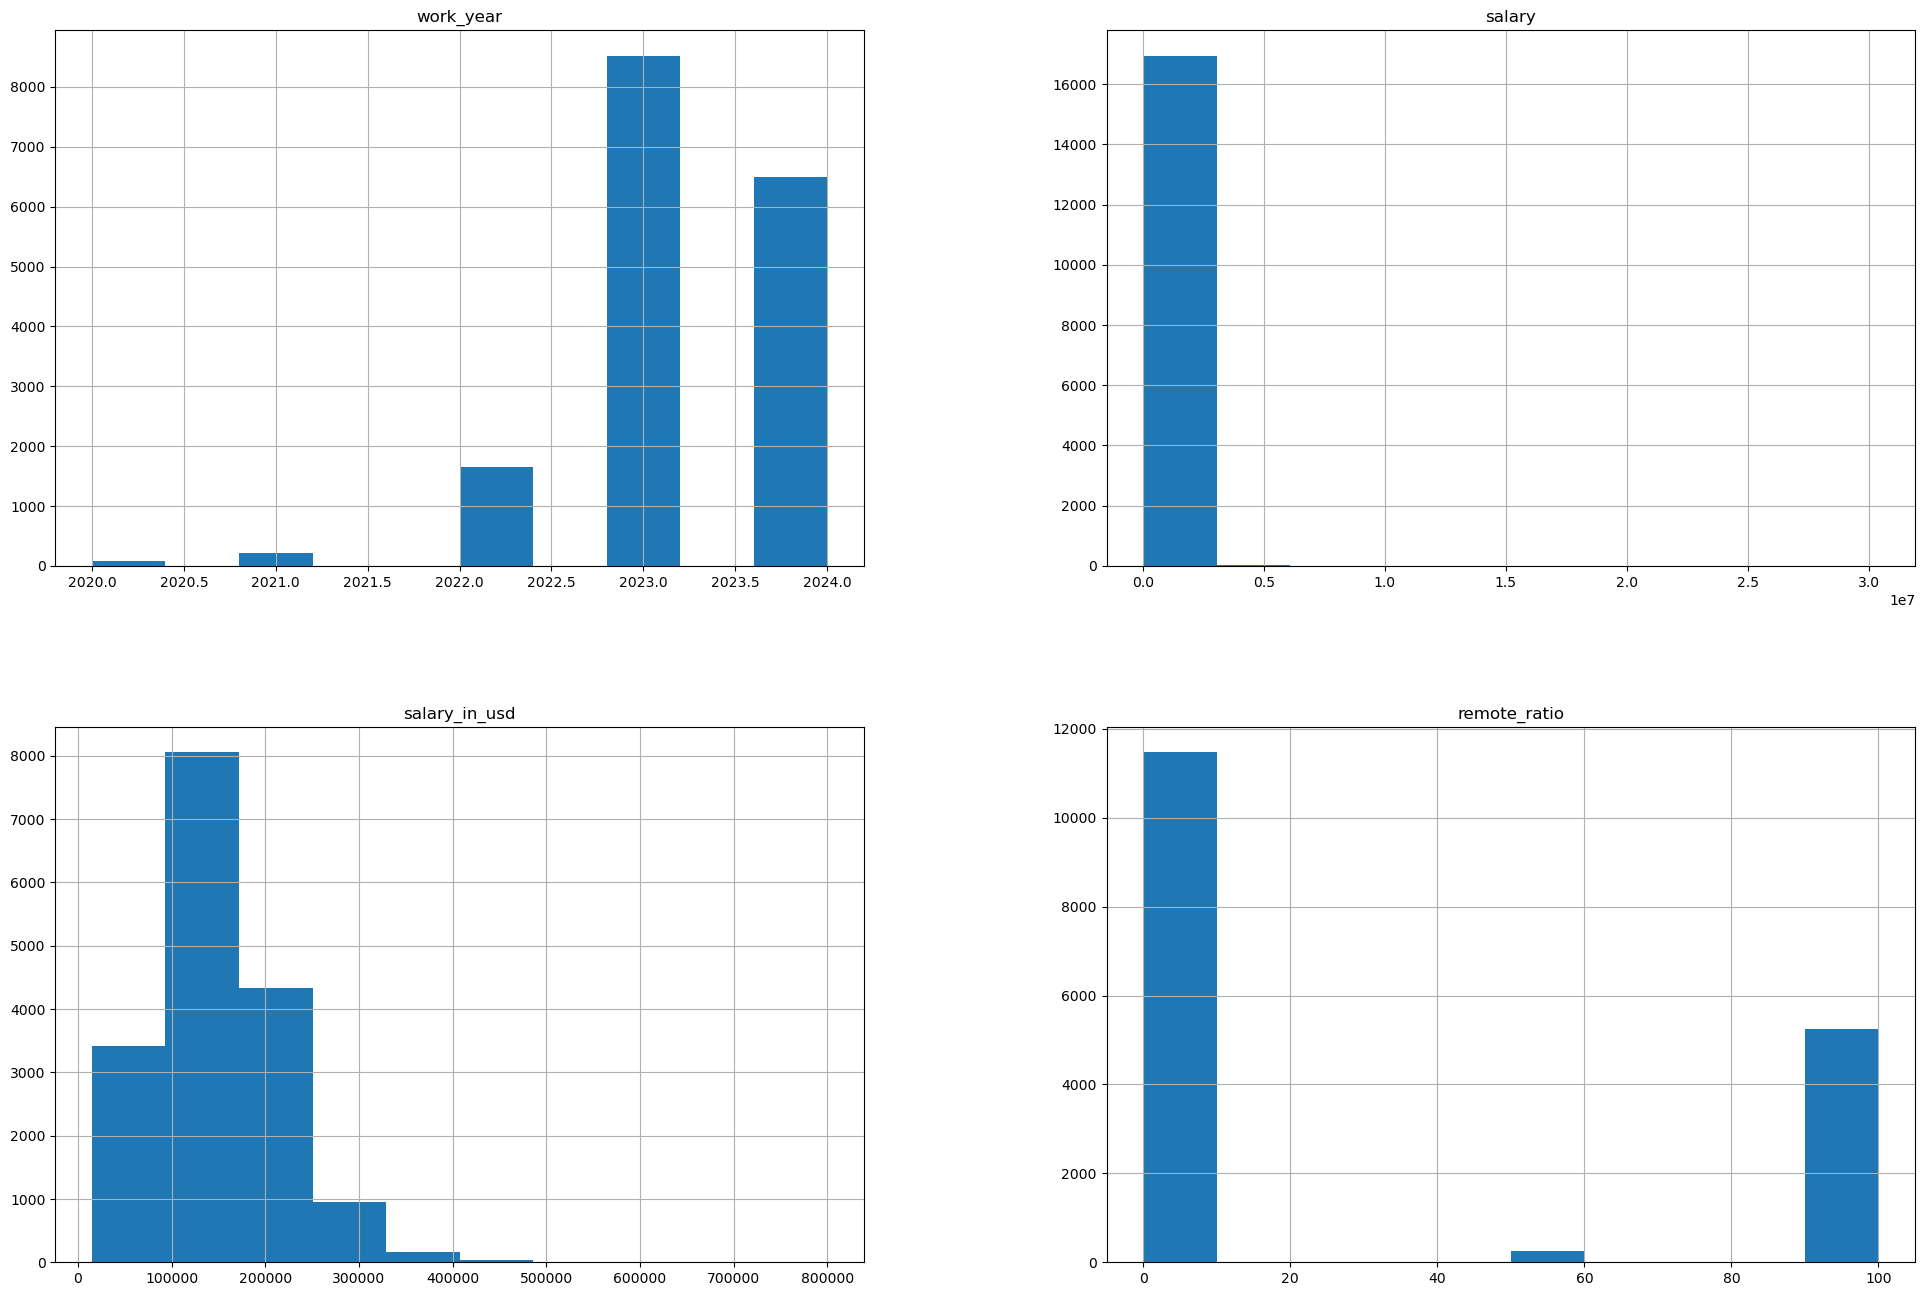

In [8]:
df.hist(figsize=(24,16))
plt.show()

In [9]:
df[['work_year','salary_in_usd']]

,work_year,salary_in_usd
0,2024,198600
1,2024,94300
2,2024,135800
3,2024,95100
4,2024,86900
...,...,...
16960,2020,412000
16961,2021,151000
16962,2020,105000
16963,2020,100000


<Axes: xlabel='work_year', ylabel='count'>

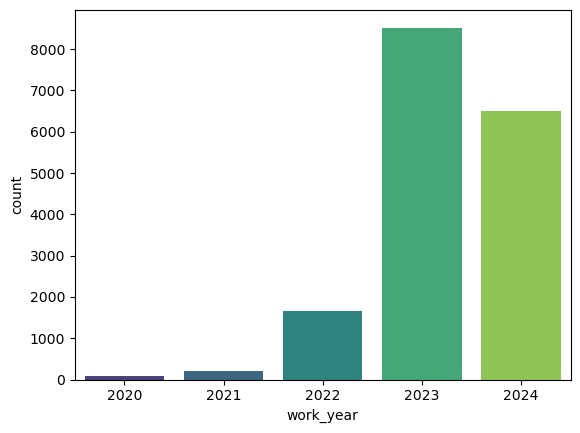

In [10]:
sns.countplot(data=df,x='work_year',palette='viridis')

### Exploring the job titles
<strong>Top 10 job titles</strong>

In [11]:
# top 10 job titles
job_titles = df['job_title'].value_counts()
top_job_titles = job_titles.nlargest(10)
top_job_titles

job_title
Data Engineer                3534
Data Scientist               3392
Data Analyst                 2500
Machine Learning Engineer    1731
Research Scientist            559
Data Architect                457
Applied Scientist             457
Analytics Engineer            433
Research Engineer             316
Data Science                  295
Name: count, dtype: int64

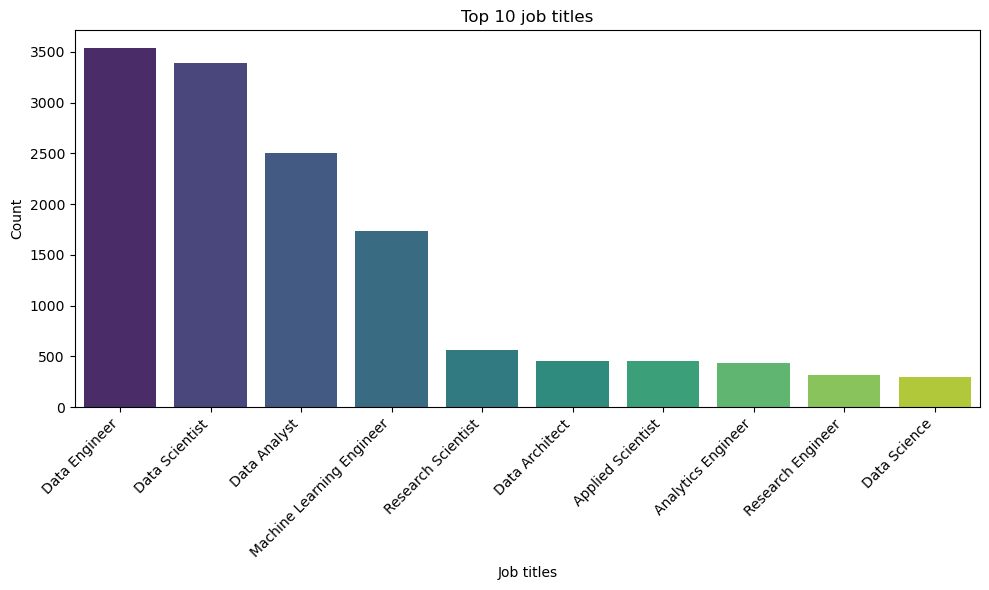

In [12]:
# plotting top 10 job titles
plt.figure(figsize=(10,6))
sns.barplot(x=top_job_titles.index, y=top_job_titles.values, palette='viridis')
plt.title("Top 10 job titles")
plt.xlabel("Job titles")
plt.ylabel("Count")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

<strong>Top 10 Highest Paying Jobs</strong>

In [13]:
# top 10 highest paying Jobs
mean_salary_in_usd = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
rounded_salaries = mean_salary_in_usd.values.round(2)
mean_salary_in_usd

job_title
Analytics Engineering Manager     399880.000000
Data Science Tech Lead            375000.000000
Head of Machine Learning          299758.428571
Managing Director Data Science    280000.000000
AWS Data Architect                258000.000000
Cloud Data Architect              250000.000000
AI Architect                      245481.393939
Director of Data Science          218775.333333
Head of Data                      211860.196721
Prompt Engineer                   205093.588235
Name: salary_in_usd, dtype: float64

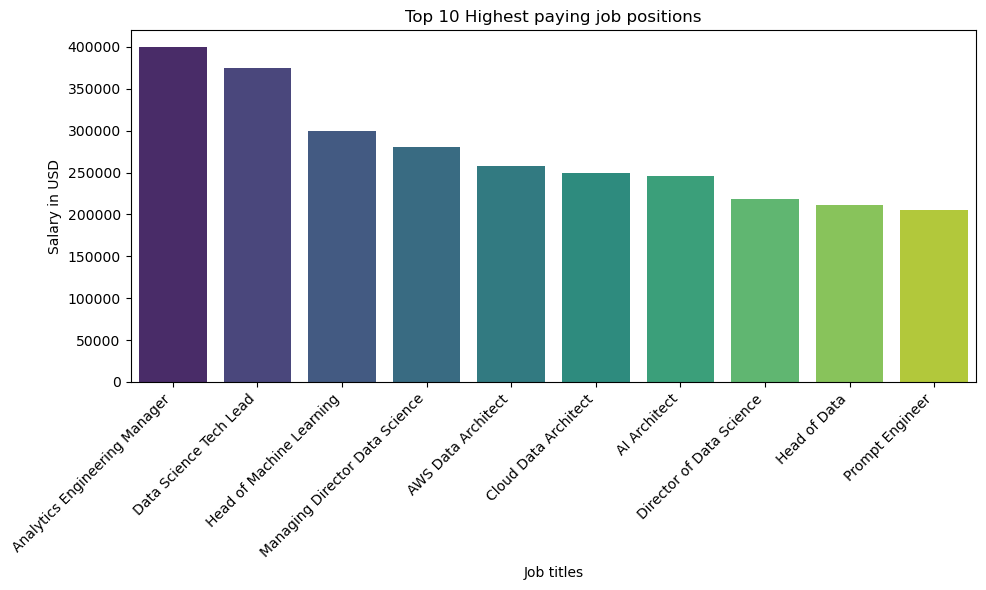

In [14]:
# plotting top 10 Highest paying job positions
plt.figure(figsize=(10,6))
sns.barplot(x=mean_salary_in_usd.index, y=rounded_salaries, palette='viridis')
plt.title("Top 10 Highest paying job positions")
plt.xlabel("Job titles")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

<strong>Average salary around the world</strong>

In [15]:
#Converting iso-3166 country codes to iso-3 country codes
iso_3166 = df['employee_residence'].to_list()
df['iso_3_employ_residence'] = coco.convert(names = iso_3166, src = 'ISO2', to = 'ISO3')
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,iso_3_employ_residence
0,2024,EN,FT,Data Scientist,198600,USD,198600,US,0,US,M,USA
1,2024,EN,FT,Data Scientist,94300,USD,94300,US,0,US,M,USA
2,2024,SE,FT,Data Science,135800,USD,135800,US,100,US,M,USA
3,2024,SE,FT,Data Science,95100,USD,95100,US,100,US,M,USA
4,2024,EN,FT,Data Science,86900,USD,86900,US,100,US,M,USA


In [16]:

fig = px.choropleth(df.groupby('iso_3_employ_residence')['salary_in_usd'].mean().reset_index(name='Average Salary'), 
                    locations='iso_3_employ_residence',
                    locationmode='ISO-3',
                    color= 'Average Salary',
                    hover_name='iso_3_employ_residence',
                    color_continuous_scale='plasma')
fig.update_geos(projection_type="natural earth", showcoastlines=True)
fig.update_layout(title_text='World Map - Average Salary')
fig.show()

<strong>Plotting a Correlation matrix</strong>

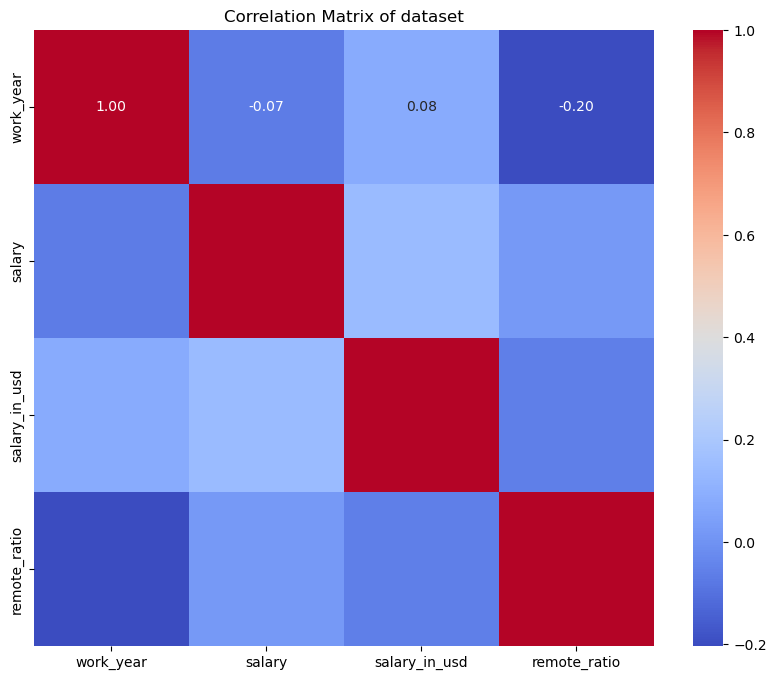

In [17]:
numerical_features = df[['work_year','salary','salary_in_usd','remote_ratio']]
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of dataset')
plt.show()

-----------------EDA Ends Here--------------------


## 4. Preparing the Data for Machine Learning Algorithms

<strong>Checking for Duplicates</strong>

In [18]:
df.duplicated().sum()

6615

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(10350, 12)

<strong>Dropping unnecessary features</strong>

In [21]:
# dropping columns based on correlation matrix and intuition
columns_to_drop = ['work_year','job_title','salary','salary_currency','employee_residence','company_location','iso_3_employ_residence']
df_tmp = df.drop(columns=columns_to_drop)
df_tmp.head()

,experience_level,employment_type,salary_in_usd,remote_ratio,company_size
0,EN,FT,198600,0,M
1,EN,FT,94300,0,M
2,SE,FT,135800,100,M
3,SE,FT,95100,100,M
4,EN,FT,86900,100,M


<strong>Converting `remote_ratio` to String from Int64</strong> 

In [22]:
df_tmp['remote_ratio'] = df_tmp['remote_ratio'].astype(str)
df_tmp.remote_ratio.dtype

dtype('O')

<strong>Checking for Missing values </strong>

In [23]:
df_tmp.isna().sum()

experience_level    0
employment_type     0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64

<strong>Making Pipeline for future dataset</strong>

- Note: Currently we don't have any missing values but this pipeline will take care 
of the new samples which might not be in clean or pre-processed state. 